# This is the worksbook which checks the information quality. 

Version 2.0, where we also show how the information quality is visualized. 

## Configuration
In the configuration section we need to define which information quality checks we perform. 

In [10]:
import matplotlib.pyplot as plt

In [4]:
iq_problems_configuration_libraries = 0     # checks that the measurement instrument can be executed, i.e. problems with the libraries
iq_problems_entity_access = 0               # checks that we can access the measured entity, in our case, this is the BugZilla database for WebKit
iq_problems_timeliness = 0                  # checks that the data is fresh, i.e. not older than the previous measurement

iq_general_error = 0                        # we need this generic error as sometimes the information_quality.log file can be misformed 
                                            # (e.g. from an aborted execution)
                                            # for the sake of simplicity, we treat this as a flag -- 0 for no errors, 1 for any number of errors

In this code, we parse the log file and extract the relevant information. Please note that this extraction is based on how we log information, not what information is logged. 

This is a design choice, which is linked to how I chose to handle the information quality in the measurement system -- I catch all exceptions and write the information that is important for this information quality system. 

In [5]:
try:
    logFile = open("./information_quality_v2.log", "r")

    for logMessage in logFile:
        # splitting the log information - again, this is linked to how we 
        # structured the log message in the measurement system    
        logItem = logMessage.split(';')
        logLevel = logItem[2]
        logSource = logItem[1]
        logTime = logItem[0]
        logProblem = logItem[3]

        # this part is about extracting the relevant information
        # if this is a problem at all:
        if (logLevel == 'ERROR'):

            # if this is a problem with the library
            if ('libraries' in logProblem):
                iq_problems_configuration_libraries += 1

            if ('TIMELINESS' in logProblem):
                iq_problems_timeliness += 1

except Exception as e:
    iq_general_error = 1

In [6]:
print(iq_problems_configuration_libraries)
print(iq_problems_timeliness)

0
2


## Visualization

Now we can visualize our information quality checks


In [7]:
def getIndicatorColor(ind_value):
    if ind_value > 0:
        return 'red'
    else:
        return 'green'

Stakeholder information quality


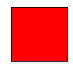

In [12]:
print('Stakeholder information quality')

# Stakeholder information quality is red if any other IQ is red
stakeholder_information_quality = iq_general_error + iq_problems_configuration_libraries + iq_problems_entity_access + iq_problems_timeliness

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_facecolor(getIndicatorColor(stakeholder_information_quality))

Libraries IQ


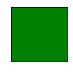

In [13]:
print('Libraries checks')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_facecolor(getIndicatorColor(iq_problems_configuration_libraries))

Entity access checks


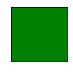

In [14]:
print('Entity access checks')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_facecolor(getIndicatorColor(iq_problems_entity_access))

Timeliness checks


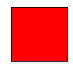

In [15]:
print('Timeliness checks')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_facecolor(getIndicatorColor(iq_problems_timeliness))

## Visualization in one table

In [31]:
columns = ('Information quality check', 'Value')
rows = ["Stakeholder IQ", "Timeliness check", 'Entity access check', 'Libraries']
cell_text = [[f'Stakeholder IQ: {stakeholder_information_quality}'], 
             [f'Timeliness: {iq_problems_timeliness}'], 
             [f'Entity access: {iq_problems_entity_access}'], 
             [f'Libraries: {iq_problems_configuration_libraries}']]
colors = [[getIndicatorColor(stakeholder_information_quality)], 
          [getIndicatorColor(iq_problems_timeliness)], 
          [getIndicatorColor(iq_problems_entity_access)],
          [getIndicatorColor(iq_problems_configuration_libraries)]]


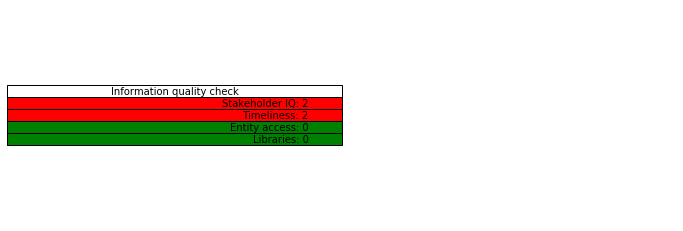

In [32]:
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=cell_text,
                     cellColours=colors,
                     colLabels=columns,
                     loc='left')

plt.show()